In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, warnings, time
import statsmodels.api as sm

from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy import stats

# 머신러닝

In [101]:
df = pd.read_csv('../Edu/code/data/26_problem1.csv')
df.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5


## 1 전처리 및 군집생성 

### 1-1

결측치 확인 및 결측치 제거 / EDA 수행

In [3]:
df.isna().sum()

ID                      0
Year_Birth              0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [5]:
df.iloc[:, 1:].describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,2.325000,4.084821,2.662054,5.790179,5.316518
std,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,1.932238,2.778714,2.923101,3.250958,2.426645
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [6]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [7]:
data_df = df.iloc[:, 1:]

num_df = data_df.select_dtypes(exclude=object)

num_df.shape

(2240, 14)

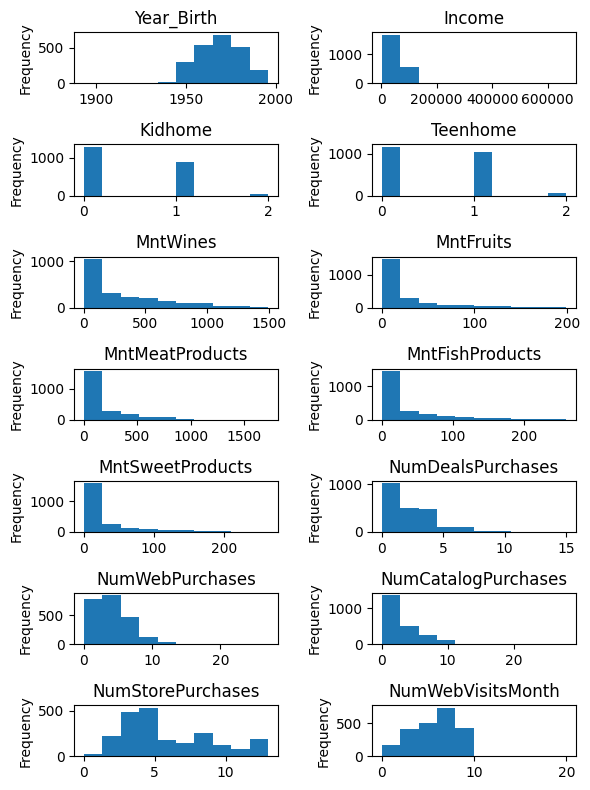

In [8]:
plt.figure(figsize=(6, 8))

for idx, col in enumerate(num_df.columns):
    plt.subplot(7, 2, idx+1)
    df[col].plot(kind='hist')
    plt.title(col)

plt.tight_layout()
plt.show();

대부분이 순서형 변수라 분포가 쏠려있는 경향을 보인다.  
Kidhome과 Teenhome 또한 명목형 변수로 확인된다.  

Income 변수의 최댓값은 평균과 10배 이상 차이가 날 정도로  
크기 때문에 Income 변수의 값이 이상값인지 확인이 필요해 보인다.

In [9]:
nan_idx = df[df.Income.isna()].index
df[df.Income.isna()]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
10,1994,1983,Married,NaN,1,0,5,5,6,0,2,1,1,0,2,7
27,5255,1986,Single,NaN,1,0,5,1,3,3,263,0,27,0,0,1
43,7281,1959,Single,NaN,0,0,81,11,50,3,2,1,1,3,4,2
48,7244,1951,Single,NaN,2,1,48,5,48,6,10,3,2,1,4,6
58,8557,1982,Single,NaN,1,0,11,3,22,2,2,2,2,0,3,6
71,10629,1973,Married,NaN,1,0,25,3,43,17,4,3,3,0,3,8
90,8996,1957,Married,NaN,2,1,230,42,192,49,37,12,7,2,8,9
91,9235,1957,Single,NaN,1,1,7,0,8,2,0,1,1,0,2,7
92,5798,1973,Together,NaN,0,0,445,37,359,98,28,1,2,4,8,1
128,8268,1961,Married,NaN,0,1,352,0,27,10,0,3,6,1,7,6


다른 변수에는 결측값이 없고, Income 변수에만 결측값이 존재한다.  
결측값은 24개이고, 전체 데이터는 2240개이므로 삭제 처리하여도 무방하겠으나  
데이터를 최대한 활용하는 편이 좋으므로 Marital_Status 변수를  
One-Hot 인코딩 처리한 후 다른 데이터를 참고하여 결측값을 대체하는  
K-NN 대체법을 활용한다.

In [10]:
oh_df = pd.get_dummies(data_df.Marital_Status).astype(int)
oh_df

,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
2235,0,0,0,1,0,0,0,0
2236,0,0,0,0,0,1,0,0
2237,0,0,1,0,0,0,0,0
2238,0,0,0,0,0,1,0,0


In [11]:
data_df = pd.concat([data_df, oh_df], axis=1)
data_df = data_df.drop(columns=['Marital_Status'])

In [12]:
data_df.head()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,1957,58138.0,0,0,635,88,546,172,88,3,...,4,7,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,11,1,6,2,1,2,...,2,5,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,426,49,127,111,21,1,...,10,4,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,11,4,20,10,3,2,...,4,6,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,173,43,118,46,27,5,...,6,5,0,0,0,1,0,0,0,0


In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
data_df['Income'] = pd.DataFrame(imputer.fit_transform(data_df)).iloc[:, 1]

In [14]:
data_df.isna().sum()

Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Absurd                 0
Alone                  0
Divorced               0
Married                0
Single                 0
Together               0
Widow                  0
YOLO                   0
dtype: int64

In [15]:
data_df.loc[nan_idx]

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
10,1983,22545.6,1,0,5,5,6,0,2,1,...,2,7,0,0,0,1,0,0,0,0
27,1986,54752.8,1,0,5,1,3,3,263,0,...,0,1,0,0,0,0,1,0,0,0
43,1959,43020.2,0,0,81,11,50,3,2,1,...,4,2,0,0,0,0,1,0,0,0
48,1951,44584.8,2,1,48,5,48,6,10,3,...,4,6,0,0,0,0,1,0,0,0
58,1982,23551.4,1,0,11,3,22,2,2,2,...,3,6,0,0,0,0,1,0,0,0
71,1973,36193.4,1,0,25,3,43,17,4,3,...,3,8,0,0,0,1,0,0,0,0
90,1957,60545.6,2,1,230,42,192,49,37,12,...,8,9,0,0,0,1,0,0,0,0
91,1957,27490.6,1,1,7,0,8,2,0,1,...,2,7,0,0,0,0,1,0,0,0
92,1973,72225.6,0,0,445,37,359,98,28,1,...,8,1,0,0,0,0,0,1,0,0
128,1961,59120.2,0,1,352,0,27,10,0,3,...,7,6,0,0,0,1,0,0,0,0


결측값을 K-NN을 통해 대체하여 처리했다.

### 1-2

이상치 제거 방법을 서술하고, 이상치 제거 후의 결과를  
통계적으로 서술

- ESD : 평균으로부터 +- 3 표준편차만큼 떨어진 값을 이상값으로 판단
- IQR : 제1사분위, 제3사분위를 기준으로 사분위 범위(Q3 - Q1)의 1.5배 이상 떨어진 값을 이상값으로 판단
- 기하평균 활용 : 깋평균으로부터 2.5 표준편차만큼 떨어진 값을 이상값으로 판단

이 중에서 상자그림으로 쉽게 확인이 가능한 IQR 방식을 통해 이상치를 확인한다.

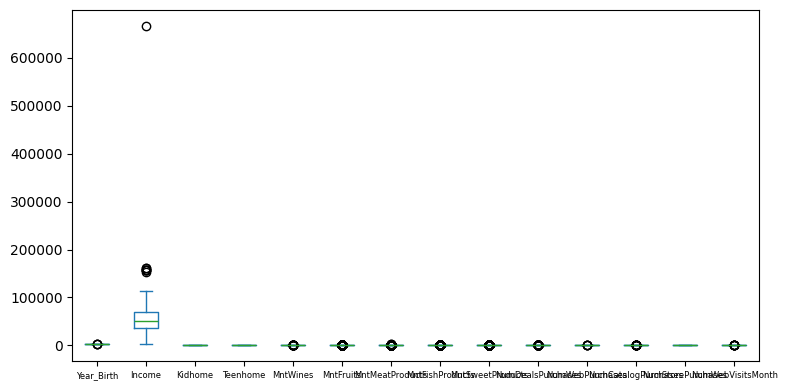

In [16]:
num_df.plot(kind='box', figsize=(8, 4));
plt.xticks(fontsize=6)
plt.tight_layout()
plt.show();

Income 변수만 확인해보면 될 것 같다.

In [17]:
q3 = data_df.Income.quantile(0.75)
q1 = data_df.Income.quantile(0.25)
iqr = q3 - q1

data_df[(data_df.Income > q3 + 1.5 * iqr) | (data_df.Income < q1 - 1.5 * iqr)]

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
164,1973,157243.0,0,1,20,2,1582,1,2,15,...,0,0,0,0,0,1,0,0,0,0
617,1976,162397.0,1,1,85,1,16,2,1,0,...,1,1,0,0,0,0,0,1,0,0
655,1975,153924.0,0,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
687,1982,160803.0,0,0,55,16,1622,17,3,15,...,1,0,0,0,0,1,0,0,0,0
1300,1971,157733.0,1,0,39,1,9,2,0,0,...,1,1,0,0,0,0,0,1,0,0
1653,1977,157146.0,0,0,1,0,1725,2,1,0,...,0,1,0,0,0,0,0,1,0,0
2132,1949,156924.0,0,0,2,1,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2233,1977,666666.0,1,0,9,14,18,8,1,4,...,3,6,0,0,0,0,0,1,0,0


2233번 행의 데이터를 제외하면 모두 고소득자로 보인다.  
따라서 이상값은 2233번 행 하나라고 할 수 있다.  
그러므로 2233번 행을 삭제 처리한다.

In [18]:
data_df = data_df.drop(index=[2233])

In [19]:
q3 = data_df.Income.quantile(0.75)
q1 = data_df.Income.quantile(0.25)
iqr = q3 - q1

data_df[(data_df.Income > q3 + 1.5 * iqr) | (data_df.Income < q1 - 1.5 * iqr)]

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
164,1973,157243.0,0,1,20,2,1582,1,2,15,...,0,0,0,0,0,1,0,0,0,0
617,1976,162397.0,1,1,85,1,16,2,1,0,...,1,1,0,0,0,0,0,1,0,0
655,1975,153924.0,0,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
687,1982,160803.0,0,0,55,16,1622,17,3,15,...,1,0,0,0,0,1,0,0,0,0
1300,1971,157733.0,1,0,39,1,9,2,0,0,...,1,1,0,0,0,0,0,1,0,0
1653,1977,157146.0,0,0,1,0,1725,2,1,0,...,0,1,0,0,0,0,0,1,0,0
2132,1949,156924.0,0,0,2,1,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0


이상값을 삭제 처리했다.

### 1-3

위에서 전처리한 데이터로 Kmeans, DBSCAN 등의 방법으로 군집 생성

DBSCAN의 경우에는 이상값 검출 등으로 활용하는 경우가 많다.  
일반적인 비계층적 군집 분석 간에는 K-Means 모델을 많이  
활용하기 때문에 군집 분석 모델로 K-Means 알고리즘을 선정한다. 

In [20]:
from sklearn.cluster import KMeans

In [21]:
df = df.drop(columns=['Marital_Status'])

K-Means 알고리즘은 비계층적 군집 분석이기 때문에 정답이 없는  
비지도 학습 알고리즘이다. 따라서 군집 수를 지정해야 하는데,  

최적의 군집 수를 설정하기 위해 Elbow Method 를 활용한다.

K=2 : 323326638159.2351
K=3 : 185570138621.1087
K=4 : 123975459488.40869
K=5 : 93688377594.67137
K=6 : 55049041017.40483
K=7 : 41294264143.2515
K=8 : 32435743131.219406
K=9 : 24625056912.08642
K=10 : 19713472555.76481


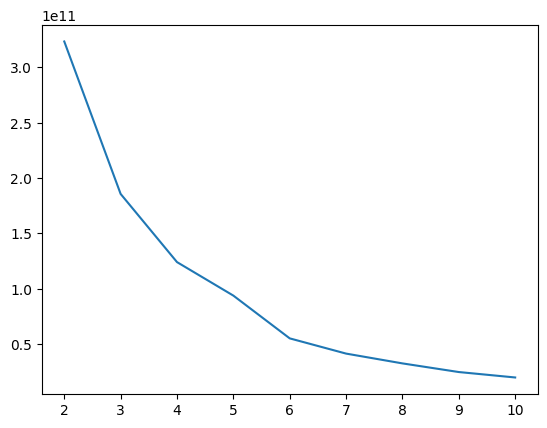

In [34]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=2025)
    kmeans.fit(data_df)
    print(f"K={k} : {kmeans.inertia_}")
    inertia.append(kmeans.inertia_)

plt.plot(list(range(2, 11)), inertia)

K=6까지 급격하게 inertia 값이 떨어지다 완만해진다.  
따라서 최적의 군집 수로 K=6을 설정한다.

In [35]:
kmeans = KMeans(n_clusters=6, random_state=2025)
kmeans.fit(data_df)
data_df['cluster'] = kmeans.labels_
data_df.cluster.head()

0    4
1    4
2    1
3    3
4    4
Name: cluster, dtype: int32

data_df에 cluster 컬럼을 생성하여 군집 번호를 할당하였다.

## 2 군집분석 

### 2-1

위에서 생성한 군집들의 특성 분석

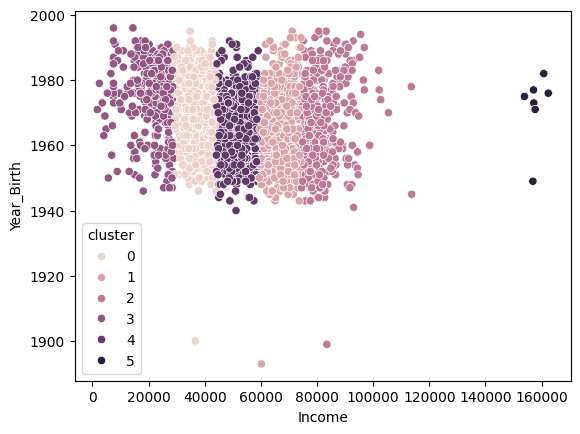

In [49]:
sns.scatterplot(data=data_df, x='Income', y='Year_Birth', hue='cluster');

클러스터별 Income과 Year_Birth의 산점도 확인 결과  
클러스터 생성 시 Income 변수에 영향을 많이 받았음을 확인할 수 있다.

클러스터별로 저소득자부터 고소득자까지 군집화가 이뤄졌다.

In [50]:
col_mnt = [col for col in data_df.columns if 'Mnt' in col]
col_mnt

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts']

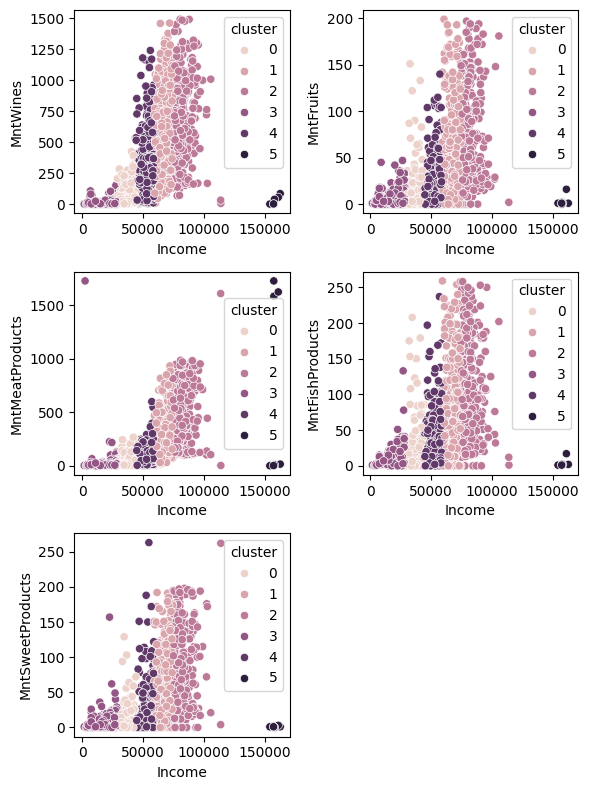

In [51]:
plt.figure(figsize=(6, 8))

for idx, col in enumerate(col_mnt):
    plt.subplot(3, 2, idx+1)
    sns.scatterplot(data=data_df, x='Income', y=col, hue='cluster');

plt.tight_layout()
plt.show();

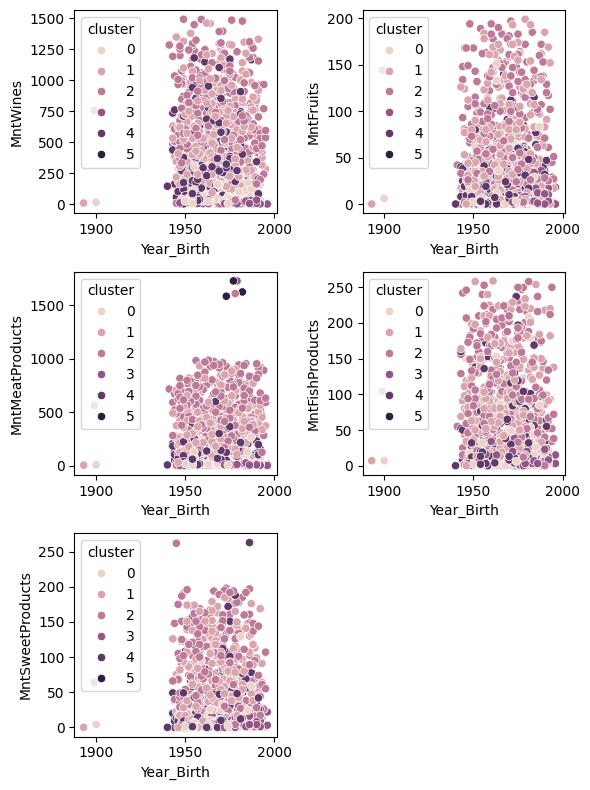

In [52]:
plt.figure(figsize=(6, 8))

for idx, col in enumerate(col_mnt):
    plt.subplot(3, 2, idx+1)
    sns.scatterplot(data=data_df, x='Year_Birth', y=col, hue='cluster');

plt.tight_layout()
plt.show();

소비금액은 군집 생성에 영향이 미비했음을 확인할 수 있다.  
하지만 소비금액과 소비상품 변수가 어느 정도 상관성이 있으므로  
생성된 군집을 통해 군집의 대략적인 소득 수준과  
소비 수준을 유추할 수 있어 보인다.

### 2-2

군집별 상품 추천

In [83]:
total_Mnt = data_df[[col for col in data_df.columns if 'Mnt' in col]].sum(axis=0).to_frame().T
for c in range(1, 6):
    total_Mnt.loc[c] = total_Mnt.loc[0]

In [86]:
spend_ratio = data_df[[col for col in data_df.columns if 'Mnt' in col] + ['cluster']].groupby('cluster').max() / total_Mnt
spend_ratio

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
cluster,,,,,
0,0.000789,0.002564,0.000714,0.002475,0.002128
1,0.002147,0.003378,0.002492,0.003082,0.003167
2,0.002193,0.003344,0.004297,0.003070,0.004322
3,0.000223,0.000798,0.004613,0.001582,0.002590
4,0.001823,0.002377,0.001602,0.002820,0.004339
5,0.000125,0.000272,0.004613,0.000202,0.000049


군집별 가장 많은 소비상품을 전제 소비개수로 나눈 비율의  
최댓값을 통해 추천 상품을 결정한다.

In [98]:
col_idx = spend_ratio.to_numpy().argmax(axis=1)

for idx, col in enumerate(col_idx):
    print(f"Cluster {idx} 추천 상품 : {total_Mnt.columns[col][3:]}")

Cluster 0 추천 상품 : Fruits
Cluster 1 추천 상품 : Fruits
Cluster 2 추천 상품 : SweetProducts
Cluster 3 추천 상품 : MeatProducts
Cluster 4 추천 상품 : SweetProducts
Cluster 5 추천 상품 : MeatProducts


### 2-3

ID가 10870인 고객을 대상으로 상품 추천

In [105]:
recomm_idx = df[df.ID == 10870].index

data_df.loc[recomm_idx].cluster

2235    1
Name: cluster, dtype: int32

ID 10870 의 군집은 1번 군집이다.  
따라서 추천 상품으로 Fruits 구매를 추천한다.

# 통계분석

## 1

한 공장에서 생산된 제품에서 최근 추정 불량률은 90%였다.  
오차의 한계가 5% 이하가 되도록 하는 최소 표본 사이즈 구하기

## 2

다음은 1월부터 9월까지의 은의 가격이다.

In [23]:
data = {'1M': [12.14], '2M': [42.6], '3M': [34.4], '4M': [35.29], '5M': [30.96],
        '6M': [57.12], '7M': [37.84], '8M': [42.49], '9M': [31.38]}

silver = pd.DataFrame(data)
silver

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


### 2-1

이동평균값 3이 설정된 시계열 그래프와 은의 가격 그래프 시각화

### 2-2

1월 대비 9월의 은의 가격은 몇 % 올랐는가? (소수점 두번째 자리에서 반올림)

## 3

A, B, C 자치구별 H 의원에 대한 찬성, 반대 투표 결과이다.  
자치구별 지지율이 같은지 검정

In [24]:
data = pd.DataFrame(
    {'A':[176, 124], 'B':[193, 107], 'C':[159, 141]},
    index=['찬성', '반대']
)

data

,A,B,C
찬성,176,193,159
반대,124,107,141


## 4

A학교 남녀 학생들의 평균 혈압 차이가 있는지 검정  
(단, 남녀 학생의 혈압 데이터는 정규분포를 따르고 등분산임을 가정)

In [25]:
df = pd.read_csv('../Edu/code/data/26_problem6.csv')
df.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


### 4-1

검정에 대한 가설 설정

### 4-2

검정통계량 구하고 결과에 대해 판단

### 4-3

평균 혈압차의 신뢰구간을 구하고, 판단 결과가  
4=2의 결과를 지지하는지 설명

## 5

problem7.csv 파일 데이터로 다음을 분석  
20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 검정

In [26]:
df = pd.read_csv('../Edu/code/data/26_problem7.csv')
df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499


### 5-1

아래 조건을 참고해 회귀계수(반올림하여 소수점 두자리) 구하기
- 베이지안 회귀모델 사용
- 1000번의 burn-in 이후 10000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포
- 오차항의 분산의 사전분포는 역감마 분포로 지정
- 형상 모수와 척도 모수는 각각 0.005로 지정

### 5-2

생성한 베이지안 회귀모델을바탕으로 키 180cm, 허리둘레 85인  
남성의 몸무게를 추정